In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet_benchmark.AutoUnet_benchmark import *
from NN_library.AutoUnet_benchmark.train_AutoUnet_benchmark import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 8)

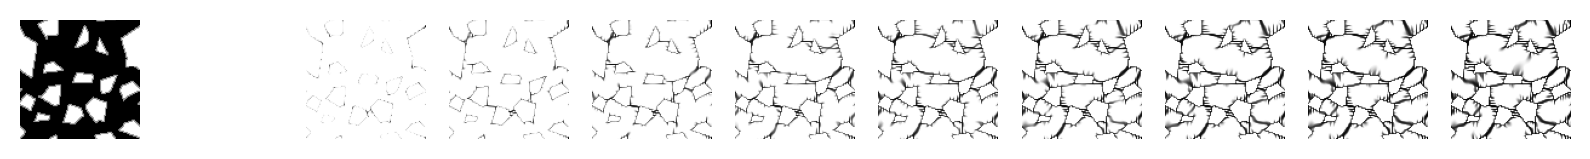

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [8]:
name = 'NN_library/AutoUnet_benchmark/AutoUnet_benchmark_x2'
args = {'lr' : 0.0000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [9]:
unet = AutoUNet(128)

In [11]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 30781827


In [10]:
unet = load_network(unet, args['name']+'_11', args)

In [12]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  20845.3073105812
Epoch: 0 batch: 100 mean train loss:  21656.3784458637
Epoch: 0 batch: 200 mean train loss:  23737.2345583439
Epoch: 0 batch: 300 mean train loss:  22767.8777065277
Epoch: 0 batch: 400 mean train loss:  22905.6828115582
Epoch: 0 batch: 500 mean train loss:  24029.0960061550
Epoch: 0 batch: 600 mean train loss:  23061.1059418917
Epoch: 0 batch: 700 mean train loss:  24114.0874511003
Epoch: 0 batch: 800 mean train loss:  21952.9711241722
Epoch: 0 batch: 900 mean train loss:  22492.5060309768
Epoch: 0 batch: 1000 mean train loss:  22168.2981911302
Epoch: 0 batch: 1100 mean train loss:  22896.5660830736
Epoch: 0 batch: 1200 mean train loss:  22802.8345371485
Epoch: 0 batch: 1300 mean train loss:  23607.2759250998
Epoch: 0 batch: 1400 mean train loss:  23194.2272789478
Epoch: 0 mean train loss:  22942.5722727162 mean val. rec. loss:  22974.3554687500
Epoch: 1 batch: 0 mean train loss:  23956.6099461913
Epoch: 1 batch: 100 mean train loss:

KeyboardInterrupt: 

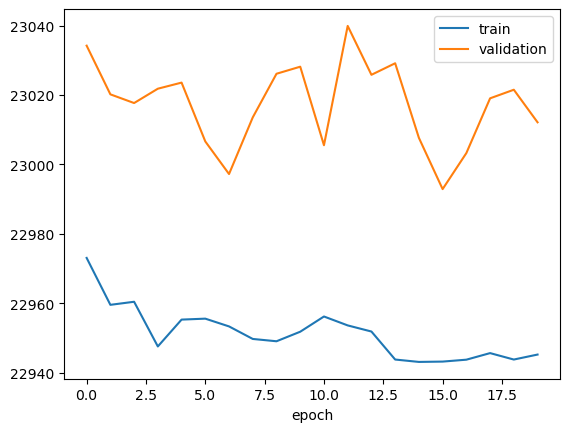

In [9]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])